# Casual trip rates

In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option("display.max_columns", 6)
plt.rcParams.update({'font.size': 18})
style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/thesis/output/casual_final.csv', index_col=0)
df = df.reset_index(drop=True)

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/thesis/output/total_trips_final.csv', index_col=0)
df2 = df2.reset_index(drop=True)

In [54]:
pd.DataFrame(df2.groupby('city')['total_trips'].sum())

,total_trips
city,
Boston,4123843
Boston Previous,3013537
Chicago,7033941
Chicago Previous,7000405
Columbus,74658
New York City,35561256
New York City Previous,31667008
Philadelphia,1317085
Pittsburgh,182664


In [5]:
df['city'] = df['city'].apply(lambda x: x.replace(' Previous', ''))
df2['city'] = df2['city'].apply(lambda x: x.replace(' Previous', ''))

In [6]:
df_casual = df.pivot_table(values='casual_rates', index='city', columns = 'month')
df_total = df2.pivot_table(values='total_trips', index='city', columns = 'month')

In [7]:
df_total_T = df_total.drop(['Columbus', 'Philadelphia', 'Pittsburgh', 'Portland'], axis=0)
df_total_C = df_total.drop(['Chicago', 'Boston', 'Washington DC', 'New York City'], axis=0)

Text(0.5, 1.0, 'Figure 2.2a Monthly Total Trips of 4 major Intervention cities (April 2017 - December 2019)')

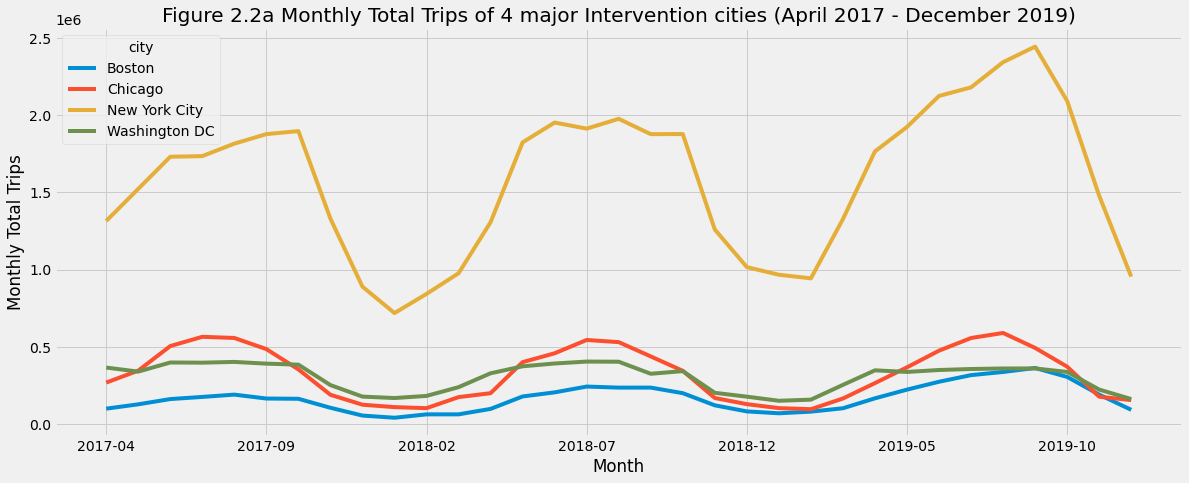

In [12]:
df_total_T.T.plot.line(figsize=(18, 7))
plt.xlabel("Month")
plt.ylabel("Monthly Total Trips")
plt.title("Figure 2.2a Monthly Total Trips of 4 major Intervention cities (April 2017 - December 2019)")

Text(0.5, 1.0, 'Figure 2.2b Monthly Total Trips of 4 cities in the control pool (April 2018 - December 2019)')

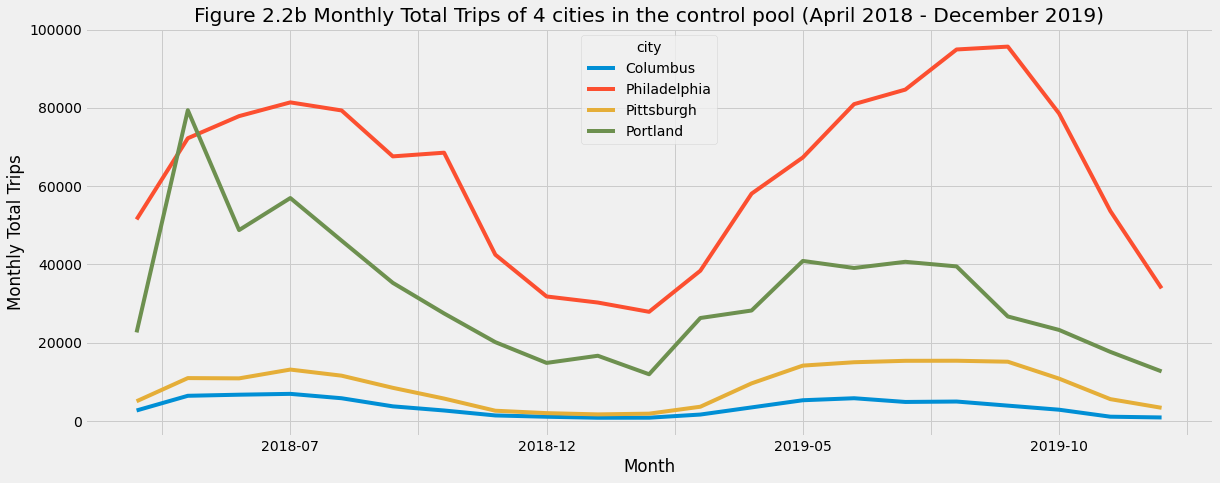

In [15]:
df_total_C.T.plot.line(figsize=(18, 7))
plt.xlabel("Month")
plt.ylabel("Monthly Total Trips")
plt.title("Figure 2.2b Monthly Total Trips of 4 cities in the control pool (April 2018 - December 2019)")

Text(0.5, 1.0, 'Figure 2.3 Monthly Casual Trip Rates of 8 Cities (April 2017 - December 2019)')

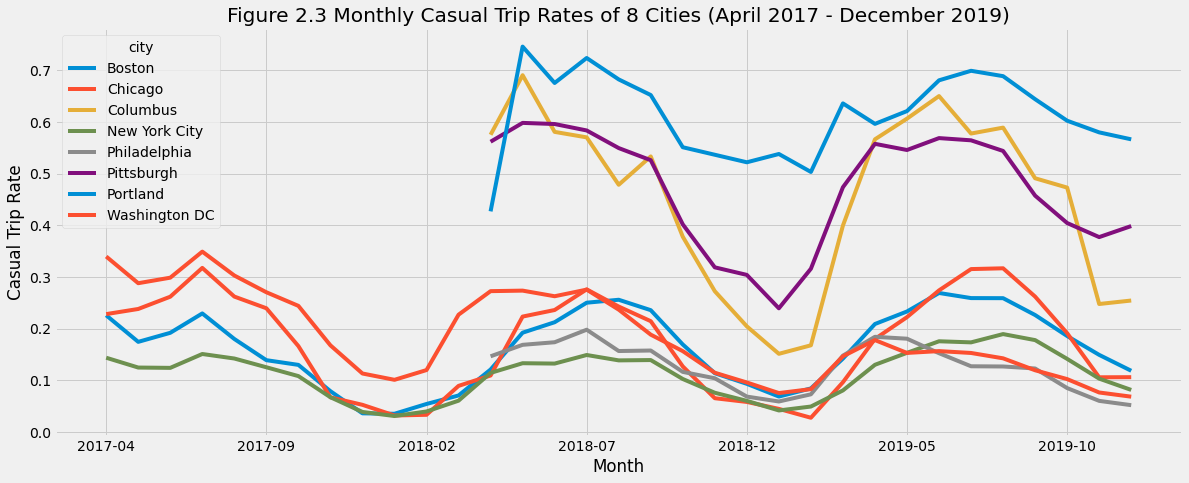

In [14]:
df_casual.T.plot.line(figsize=(18, 7))
plt.xlabel("Month")
plt.ylabel("Casual Trip Rate")
plt.title("Figure 2.3 Monthly Casual Trip Rates of 8 Cities (April 2017 - December 2019)")

In [ ]:
#add a year to previous years data

def add_year(x):
  year = int(x[3]) + 1
  y = x[:3] + str(year) + x[3+1:]
  return y

for i in range(df.shape[0]):
  if 'Previous' in df.loc[i, 'city']:
    df.loc[i, 'month'] = add_year(df.loc[i, 'month'])